In [7]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Data

In [66]:
from data import load
inputs, outputs, reference = load('bec1d.data')

Get 50 samples from 512 data points

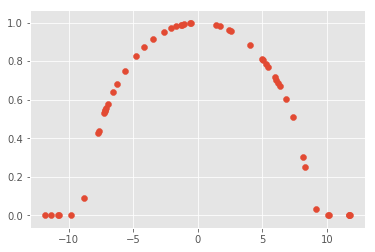

In [27]:
idx = torch.randint(0, 512, (50,))
train_x = torch.tensor(reference['x'][idx]).float()
train_y = torch.tensor(outputs[0][idx]).float()
plt.scatter(train_x.data.numpy(), train_y.data.numpy())

- BEC tensor

In [172]:
N = 50000
x_size = 512

g = torch.tensor(inputs).float()
x = torch.tensor(reference['x']).float()
y = torch.tensor(outputs).float()

gx = torch.stack(
    [g.view(1, -1).repeat(x_size, 1).t(), x.repeat(N, 1)]
).permute(1, 0, 2)

In [187]:
gxy = torch.cat([gx, y.view(N, 1, -1)], dim=1)

In [312]:
M = 1000
gxy_tensor_short = gxy.permute(1, 0, 2)[:M].contiguous().view(3, -1).t()
gx_samples = gxy_tensor_short[torch.randint(0, gxy_tensor_short.size(0), (M,))]

In [314]:
X = gx_samples[:, :2]
y = gx_samples[:, -1]

In [316]:
X.size(), y.size()

(torch.Size([1000, 2]), torch.Size([1000]))

## 2D Gaussian

In [5]:
import numpy as np
from itertools import product

In [317]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Input space
x1 = np.linspace(X[:,0].min(), X[:,0].max()) #p
x2 = np.linspace(X[:,1].min(), X[:,1].max()) #q
x = (np.array([x1, x2])).T

kernel = C(1.0, (1e-3, 1e3)) * RBF([5,5], (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15)

gp.fit(X, y)

/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.16946864, 1.12595875, 0.44454257]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 127, 'nit': 34, 'warnflag': 2}
  " state: %s" % convergence_dict)
/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.40390077, -3.37391184, -2.65563897]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 104, 'nit': 20, 'warnflag': 2}
  " state: %s" % convergence_dict)
/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([   39.00571442, -1482.63753484,   -16.68013109]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 75, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
/usr/local/lib/python3.6/site-packag

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=[5, 5]),
             n_restarts_optimizer=15, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

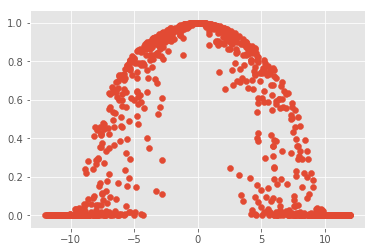

In [318]:
plt.scatter(X[:, 1].data.numpy(), gp.predict(X))